# Boston Housing Dataset


<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/boston.jpg" width=1000>

The Boston data frame has 506 rows and 14 columns.This dataframe contains the following columns:


CRIM  = per capita crime rate by town.

ZN = proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS = proportion of non-retail business acres per town.

CHAS = Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX = nitrogen oxides concentration (parts per 10 million).

RM = average number of rooms per dwelling.

AGE = proportion of owner-occupied units built prior to 1940.

DIS = weighted mean of distances to five Boston employment centres.

RAD = index of accessibility to radial highways.

TAX = full-value property-tax rate per $10,000.

PTRATIO = pupil-teacher ratio by town.

B = 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT = lower status of the population (percent).

price = median value of owner-occupied homes in $1000s

** Price is the TARGET variable **

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/boston_houses.csv

--2025-03-20 11:06:41--  https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/boston_houses.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.143.46, 52.95.144.30, 3.5.246.55, ...
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.143.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35230 (34K) [text/csv]
Saving to: ‘boston_houses.csv’

boston_houses.csv   100%[===================>]  34.40K  52.8KB/s    in 0.7s    

2025-03-20 11:06:43 (52.8 KB/s) - ‘boston_houses.csv’ saved [35230/35230]



In [3]:
data = pd.read_csv("boston_houses.csv")
data.rename(columns={'MEDV': 'Price'}, inplace=True)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [6]:
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


# Data Visualization

In [7]:
sns.pairplot(data)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
sns.pairplot(data,hue='TAX')

Output hidden; open in https://colab.research.google.com to view.

CREARE VARIABILI CATEGORICHE PER VARIABILI CONTINUE E VISUALIZZARLE

In [9]:
df_cat=data.copy()

In [10]:
def get_age_category(x):
    if x < 50:
        return 'New'
    elif 50 <= x < 85:
        return 'Old'
    else:
        return 'Very_Old'

df_cat['AGE_category'] = df_cat['AGE'].apply(get_age_category)

In [11]:
df_cat.groupby('AGE_category').size()

,0
AGE_category,
New,147
Old,149
Very_Old,210


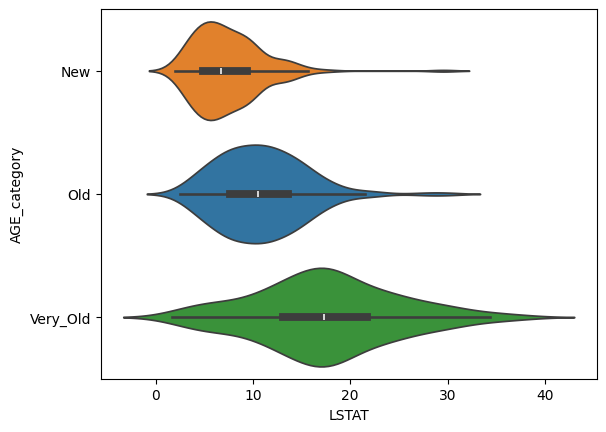

In [12]:
sns.violinplot(x='LSTAT', y='AGE_category', data=df_cat, order=['New', 'Old','Very_Old'],hue='AGE_category');

In [13]:
sns.pairplot(df_cat, hue='AGE_category',hue_order=['New', 'Old','Very_Old']);

Output hidden; open in https://colab.research.google.com to view.

In [14]:
############ fine esperimento

In [15]:
# define numeric and categorical columns
num_col = data.describe().columns.tolist()
all_col = data.columns.tolist()
obj_col = [i for i in all_col if i not in num_col]

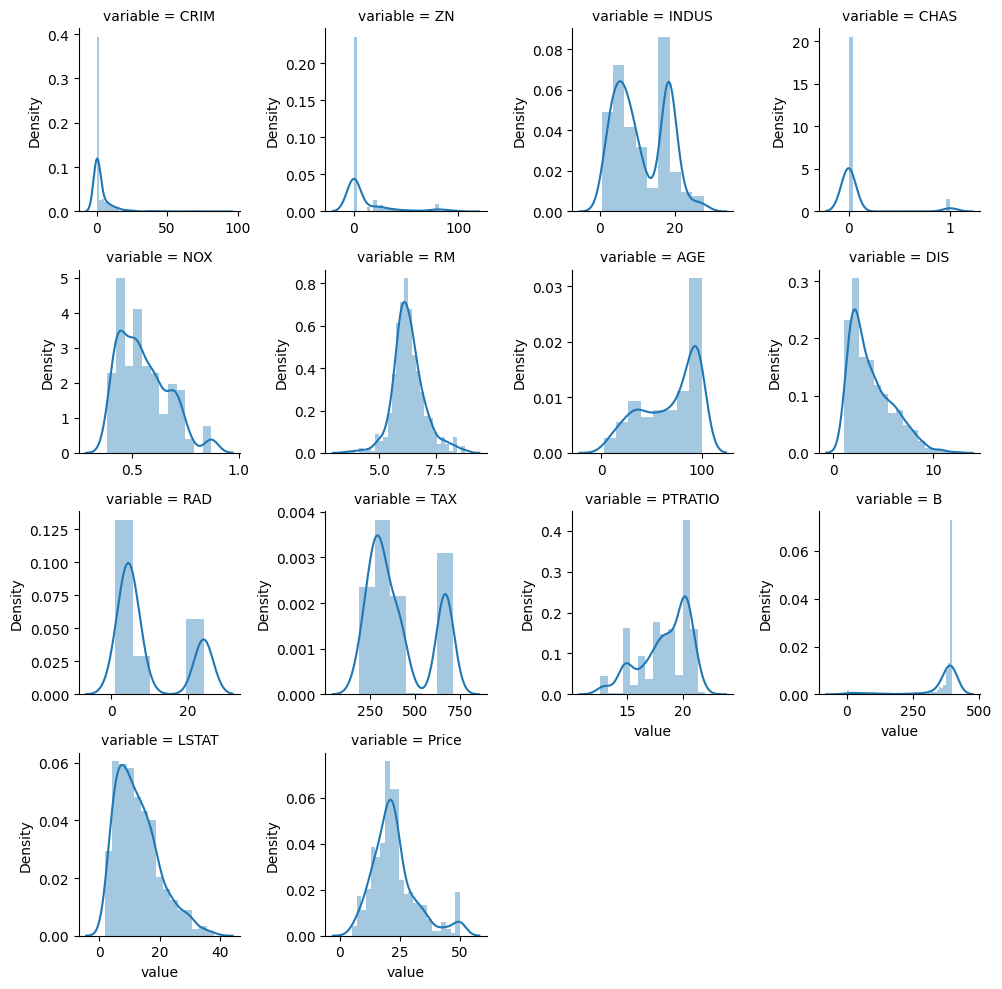

In [16]:
def viz(df,types):
    num = df
    f = pd.melt(num, value_vars=num)
    g = sns.FacetGrid(f, col="variable",  col_wrap=4,
                      sharex=False, sharey=False,height=2.5)
    g = g.map(types, "value")
    plt.show()
    return (g)
# histogram visualization
viz(data[num_col], sns.distplot)

In [17]:
# !pip install --upgrade klib

# import klib
# klib.dist_plot(data)

In [18]:
!pip install jupyter-summarytools -q

from summarytools import dfSummary
dfSummary(data)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CRIM[float64],Mean (sd) : 3.6 (8.6)min < med < max:0.0 < 0.3 < 89.0IQR (CV) : 3.6 (0.4),504 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAgVJREFUeJzt18Fu2kAURuE7hdABKhtEa3Zs2XXBkofow+YhvOU9kAyyhWPHCE133VQtsR0r+ZPzrZnLLI7Gui6EYMB79+WtLwC8xPjeD5xzUzObdJzfhBCqjmeBP/4bqnNuulqtfkVRtOwyvCiKs3PukVjR170XdRJF0XK/31dxHNdtBud57tM0XWZZNjEzQkUvdz/9ZmZxHNdJkjx1mD/tcAb4C8sUJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJIyHHH673R7MLHLOdR3RhBCqV7wSRA0WalmWD9fr9edmsxmNRqO6y4yiKM7OuUdixWChNk0z9t7PdrtdvV6vz23P53nu0zRdZlk2MTNC/eQG/fSbmc3n8zpJkqeOx6evehnIYpmChMFf1D56LmMsYh/Iuw217zLGIvaxvCjUPM9928GXy8WbmZVl6Y/H46zt+dPp9M17P9tut26xWDy3OVtV1dfD4fAjy7Lvzrmi7X/jTTyHEP75IP0Gf/R/Ra6pcq0AAAAASUVORK5CYII="">",0(0.0%)
2,ZN[float64],Mean (sd) : 11.4 (23.3)min < med < max:0.0 < 0.0 < 100.0IQR (CV) : 12.5 (0.5),26 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAArZJREFUeJzt2D9v2kAYx/Hn+FeTuucgKrKxdMhQqUNGL30HfbFZu3UgUrdkZ4+ikGAEwcVy3ClVpUohPgfBL/1+Zp7jZL7Y8rmqqgw4dK19bwB4ic62Dzjn+mbWC1x/U1XVOnAW+OPZUJ1z/eFw+M17PwhZfLFY3DvnzokVTW27o/a894M0TddJkuR1Fs6yLJpMJoPZbNYzM0JFI1sf/WZmSZLko9HoIWD9fsAM8A9epiCBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGhs+8NPMc51zezXuD4pqqq9WvuB/tzsKE65/rD4fCb934QMr9YLO6dc+fE+jYcbKhm1vPeD9I0XSdJktcZzLIsmkwmg9ls1jMzQn0DDjlUMzNLkiQfjUYPAaP9V98M9oaXKUggVEg4+Ed/qLIsu2bmnXOhS/x3pwYNT1nMdnjNdhpqw1j84+NjN2RwtVp1i6L4Mh6P2+12u9aL2JP5fL50zn03s5B5ucibnrKY7faa7SzUprEURRGVZfk5z/MfZlbrZWqz2XSiKDo6OzvLT05O7ut+9/X19YeLi4uv4/H4Y8jeG/5gLTN7DJhrOu/jOB6labqoe8pi1vyabTtOfFGoWZZFdb/47u4ujqLo6PT01B0fH/+qO397extNp9OjLMve39zcbOrMLpfL2vv9W1EUndC9z+fz+PLyMugHK8uyu1qtPsVxPG21WkW9XTebf7oxFEXx0wL+YE2u2Xq9fnd1dfXsceJvkMHwUVgqj5MAAAAASUVORK5CYII="">",0(0.0%)
3,INDUS[float64],Mean (sd) : 11.1 (6.9)min < med < max:0.5 < 9.7 < 27.7IQR (CV) : 12.9 (1.6),76 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAtZJREFUeJzt3bFu2kAYwPHvCoELIBuERLasDJU6ZOQh+rB9hAw8QVYmNhRARqGhgKFTKlUNAd/ZzX3H/7cfsXR/WbZzZ5vj8ShA6L589gEAl6h/9gHgb8aYWxFpePzE9ng8vpZ1PKEg1IAYY277/f73JEl6rr+xWq2WxpgfscVKqGFpJEnSG41Gr2mabooOzrLMjsfj3nw+b4gIoaJaaZpuBoPBT8fht6UeTCC4mYIKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqBD06inPRcRRLiC+VsGG6ruIONYFxNeq0lA9z4hJp9MZjEajVdFFxDEvIL5WlYXqe0bc7XY2z/OvzWbz0XERcZQLiK9VlWdUr20V0+m09/T01Nrv97UqDg66VH6N6rqtYrlcckbEHzyeggqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFChbMLpz32PSWHw+HGYRzwjw9D9dn39LbnabPZPIqI64cTABE5f0Z13vfEnieU6aI9Uy77ntjzhDJxMwUVgn1TCtzkeX4jIokxxmV4sK9BijZUzwkTCXjSTlmv1ze73e7b/f19rVarFX6XQsivQYoyVN8JEwl70k7Zbrd1a23r4eFhc3d3tywyNvTXIEUZqs+EiYQ/aee0223Xb6kGewMcZahvPCZMJOBJu0bc9UMFQoUKhAoVCBUqECpUIFSoQKhQgVChQtQP/H3EurhDK0J9R8yLO7Qi1HfEvLhDK0L9QIyLO7QiVJSmym/XEipKUfW3awkVZXHesXzJdT2holSuX2qUM9f1hFoBj2ewvF3mBEItmc8zWN4uc9pFoWZZZov+8MvLixURWa/Xdjabtf7n+M/824vFomOtbQ2HQ9Ptdn8VGfv8/Gwnk0kry7L2bDbbFhkr4nfcWZbZPM/r4v7fuORwONRdWrlkzG8f23BJrdCctQAAAABJRU5ErkJggg=="">",0(0.0%)
4,CHAS[int64],1. 02. 1,471 (93.1%)35 (6.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATpJREFUeJzt2zFqw0AURdE/QZ

## Regressione con tutte le Features

In [19]:
## STEP1 DEFINIZIONE DI INPUT E OUTPUT
target = 'Price'
X = data.drop(columns=[target])
y = data[target]

In [20]:
## STEP2 TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=667,
                                                   )

In [21]:
## STEP3 MODELLAZIONE (REGRESSION)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
## STEP4 PREDIZIONE
y_pred = model.predict(X_test)

In [23]:
## STEP5 VERIFICA METRICHE (for Regression)
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)

print(f'R2 score {r2}')
print(f'MSE score {mse}')
print(f'MAE score {mae}')
print(f'RMSE score {rmse}')

R2 score 0.6113097827490286
MSE score 34.48551396483917
MAE score 3.6837720318116576
RMSE score 5.872436799561079


### Feature Selection with correlation

In [24]:
corrmat = data.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


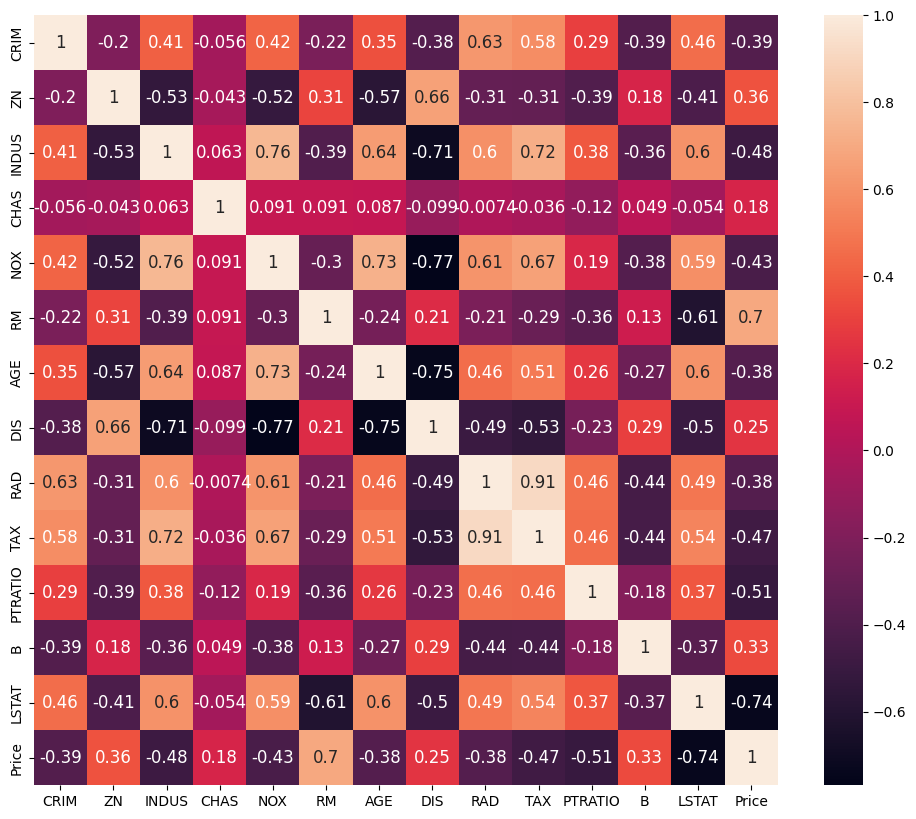

In [25]:
plt.figure(figsize = (12, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12});

In [81]:
corrmat.index.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price'], dtype=object)

In [82]:
##1
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []

    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])

    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [84]:
# Prendi la colonna Price del dataframe data, applica la treshold e includi in questo dataframe le features
threshold = 0.45
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

,Corr Value
INDUS,-0.483725
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [85]:
corr_value.index.values


array(['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'Price'], dtype=object)

In [86]:
correlated_data = data[corr_value.index]
correlated_data

,INDUS,RM,TAX,PTRATIO,LSTAT,Price
0,2.31,6.575,296,15.3,4.98,24.0
1,7.07,6.421,242,17.8,9.14,21.6
2,7.07,7.185,242,17.8,4.03,34.7
3,2.18,6.998,222,18.7,2.94,33.4
4,2.18,7.147,222,18.7,5.33,36.2
...,...,...,...,...,...,...
501,11.93,6.593,273,21.0,9.67,22.4
502,11.93,6.120,273,21.0,9.08,20.6
503,11.93,6.976,273,21.0,5.64,23.9
504,11.93,6.794,273,21.0,6.48,22.0


In [87]:
correlated_data.shape

(506, 6)

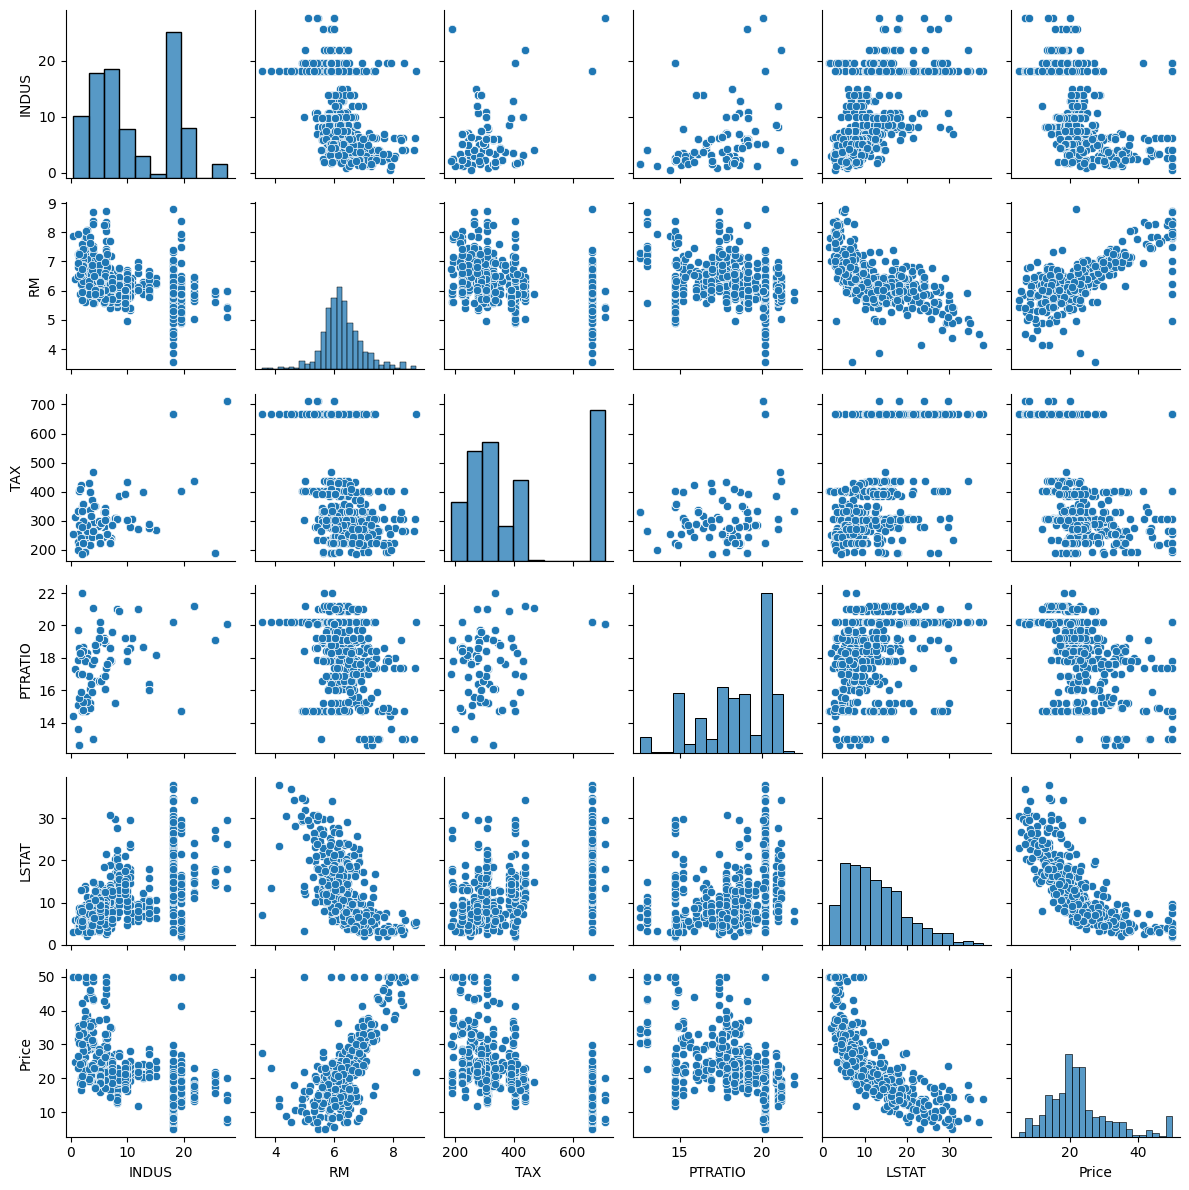

In [89]:
sns.pairplot(correlated_data,height=2)
plt.tight_layout()

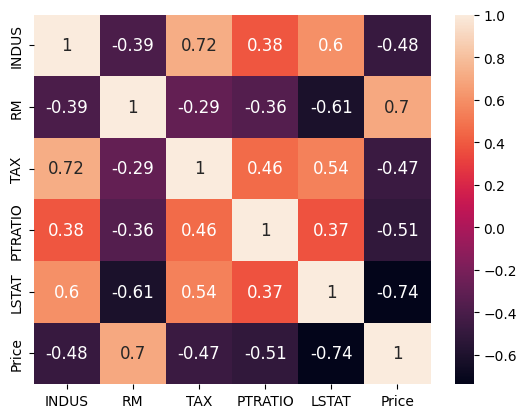

In [90]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 12});

## Shuffle and Split Data

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error

In [93]:
X = correlated_data.drop(labels=['Price'], axis = 1)
y = correlated_data['Price']

X

,INDUS,RM,TAX,PTRATIO,LSTAT
0,2.31,6.575,296,15.3,4.98
1,7.07,6.421,242,17.8,9.14
2,7.07,7.185,242,17.8,4.03
3,2.18,6.998,222,18.7,2.94
4,2.18,7.147,222,18.7,5.33
...,...,...,...,...,...
501,11.93,6.593,273,21.0,9.67
502,11.93,6.120,273,21.0,9.08
503,11.93,6.976,273,21.0,5.64
504,11.93,6.794,273,21.0,6.48


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 667
                                                    )

In [96]:
X_train.shape, X_test.shape

((404, 5), (102, 5))

## Start train the model

In [97]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [98]:
y_pred = model.predict(X_test)

In [99]:
df = pd.DataFrame(data = [y_pred, y_test])
df = df.T
df.columns = ['predetti', 'reali_test']
df

,predetti,reali_test
0,22.020759,18.7
1,20.918932,18.5
2,30.655165,29.8
3,6.819269,9.7
4,22.483853,21.7
...,...,...
97,18.560542,27.5
98,23.012295,21.4
99,16.751238,15.6
100,22.363613,29.6


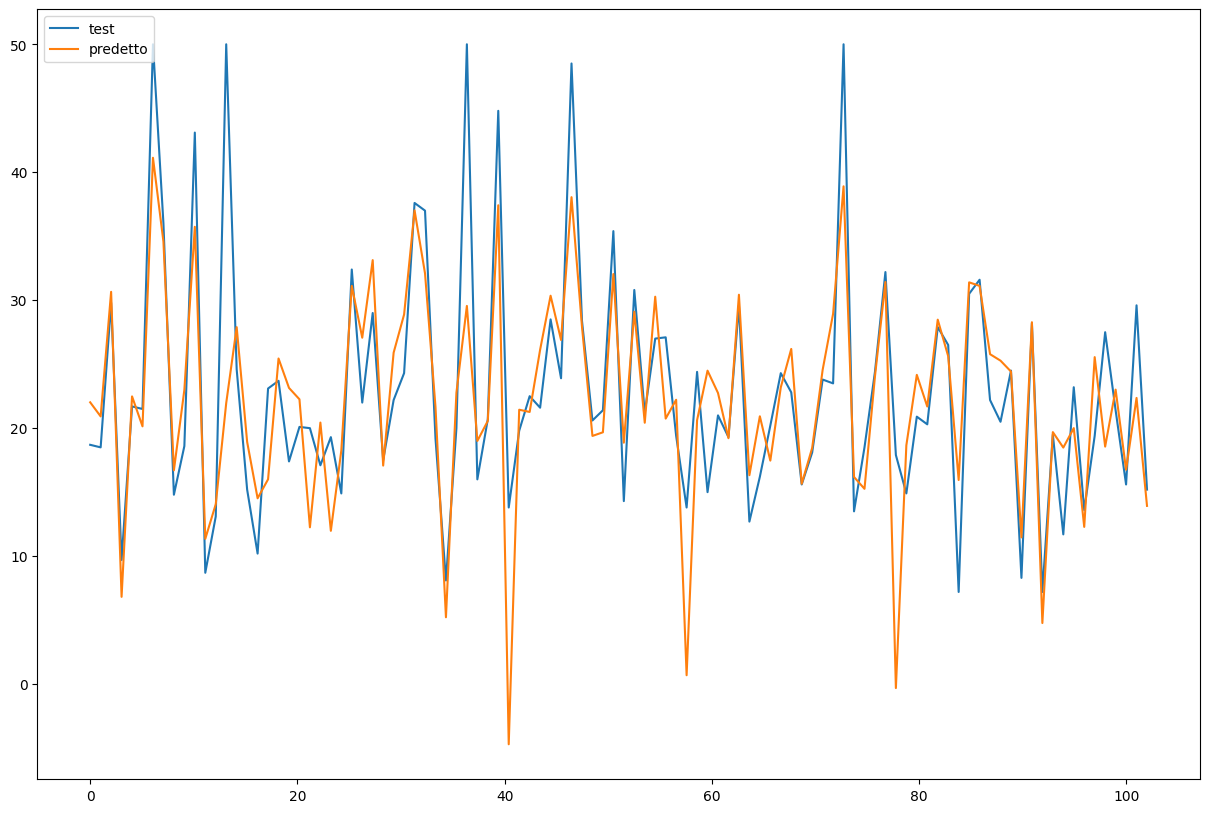

In [100]:
length = y_pred.shape[0] #
x = np.linspace(0,length,length)


plt.figure(figsize=(15,10))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);

## Defining performance metrics


It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the coefficient of determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.

For the performance_metric function in the code cell below, you will need to implement the following:

Use r2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict. Assign the performance score to the score variable.

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [101]:
from sklearn.metrics import r2_score

In [102]:
correlated_data.columns


Index(['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'Price'], dtype='object')

In [103]:
score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)
print('rmse: ', rmse)

r2_score:  0.5971252884177827
mae:  3.9979819763532
mse:  36.03788023808321
rmse:  6.003155856554385


In [104]:
threshold = 0.40
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

,Corr Value
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [105]:
##2
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
r2_adjusted_scores = []
mae_values = []
mse_values = []
rmse_values = []

def performance_metrics(features, th, y_true, y_pred):
    n = len(y_true)
    p = len(features) - 1  # excluding the intercept

    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)

    total_features.append(len(features) - 1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(round(r2,2))
    r2_adjusted_scores.append(round(adj_r2,2))
    mae_values.append(round(mae,2))
    mse_values.append(round(mse,2))
    rmse_values.append(round(rmse,2))

    metrics_dataframe = pd.DataFrame(data=[total_features_name, total_features, selected_correlation_value,
                                           r2_scores, r2_adjusted_scores, mae_values, mse_values, rmse_values],
                                     index=['features name', '#feature', 'corr_value', 'R2', 'R2_adjusted', 'MAE', 'MSE', 'RMSE'])
    return metrics_dataframe.T

In [106]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_pred)

,features name,#feature,corr_value,R2,R2_adjusted,MAE,MSE,RMSE
0,['INDUS' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'Price'],5,0.4,0.6,0.58,4.0,36.04,6.0


## regression plot of the features correlated with the price

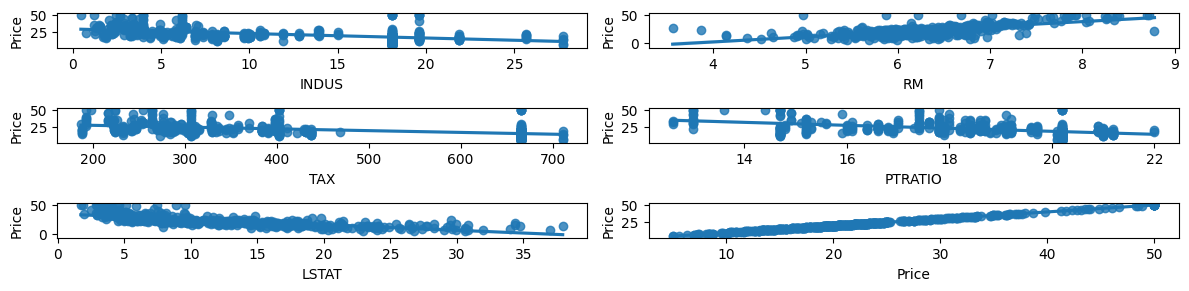

In [107]:
rows = 3
cols = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (12, 3))

col = correlated_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]], y = correlated_data['Price'], ax = ax[i][j])
        index = index + 1
fig.tight_layout()

### Let's find out other combination of columns to get better accuracy >60%

In [108]:
corrmat['Price']


,Price
CRIM,-0.388305
ZN,0.360445
INDUS,-0.483725
CHAS,0.175260
NOX,-0.427321
RM,0.695360
AGE,-0.376955
DIS,0.249929
RAD,-0.381626
TAX,-0.468536


In [109]:
threshold = 0.50
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

,Corr Value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [110]:
correlated_data = data[corr_value.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


In [111]:
##3

def get_y_predict(corr_data):
    X = corr_data.drop(labels = ['Price'], axis = 1)
    y = corr_data['Price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 667)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred,y_test

In [112]:
y_pred,y_test = get_y_predict(correlated_data)


In [113]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_pred)


,features name,#feature,corr_value,R2,R2_adjusted,MAE,MSE,RMSE
0,['INDUS' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'Price'],5,0.4,0.6,0.58,4.0,36.04,6.0
1,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.6,0.59,4.01,35.72,5.98


Let's find out other combination of columns to get better accuracy >70%

In [114]:
corrmat['Price']


,Price
CRIM,-0.388305
ZN,0.360445
INDUS,-0.483725
CHAS,0.175260
NOX,-0.427321
RM,0.695360
AGE,-0.376955
DIS,0.249929
RAD,-0.381626
TAX,-0.468536


In [116]:
threshold = 0.60
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

,Corr Value
RM,0.695360
LSTAT,-0.737663
Price,1.000000


In [117]:
correlated_data = data[corr_value.index]
correlated_data.head()

,RM,LSTAT,Price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [118]:
y_pred,y_test = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_pred)

,features name,#feature,corr_value,R2,R2_adjusted,MAE,MSE,RMSE
0,['INDUS' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'Price'],5,0.4,0.6,0.58,4.0,36.04,6.0
1,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.6,0.59,4.01,35.72,5.98
2,['RM' 'LSTAT' 'Price'],2,0.6,0.55,0.54,4.43,40.08,6.33


In [119]:
threshold = 0.70
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

,Corr Value
LSTAT,-0.737663
Price,1.000000


In [120]:
correlated_data = data[corr_value.index]
correlated_data.head()

,LSTAT,Price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [121]:
y_pred,y_test = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_pred)

,features name,#feature,corr_value,R2,R2_adjusted,MAE,MSE,RMSE
0,['INDUS' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'Price'],5,0.4,0.6,0.58,4.0,36.04,6.0
1,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.6,0.59,4.01,35.72,5.98
2,['RM' 'LSTAT' 'Price'],2,0.6,0.55,0.54,4.43,40.08,6.33
3,['LSTAT' 'Price'],1,0.7,0.46,0.46,4.93,48.09,6.93


In [68]:
## Best R2_adjusted is with 3 features: 'RM' 'PTRATIO' 'LSTAT'

In [126]:
## Scegliamo soluzione a 3 variabili
X = data[['RM','PTRATIO','LSTAT']]
y = data['Price']

X

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33
...,...,...,...
501,6.593,21.0,9.67
502,6.120,21.0,9.08
503,6.976,21.0,5.64
504,6.794,21.0,6.48


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 667
                                                    )

In [128]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [129]:
import joblib

joblib.dump(model,'lr_boston.pkl')

['lr_boston.pkl']

In [130]:
loaded_model = joblib.load('lr_boston.pkl')
loaded_model

LinearRegression()

In [131]:
loaded_model.predict([[6.5, 15.3,5]])[0]

np.float64(30.87040997130472)

In [132]:
model.intercept_

np.float64(19.082310457569708)

In [133]:
model.coef_

array([ 4.35588773, -0.87654899, -0.62279423])

In [134]:
#y' = b0+b1*x1+b2*x2+b3*x3

# Normalization and Standardization

Standardization = Gaussian with zero mean and unit variance.

 Z is rescaled such that any specific z will now be 0 ≤ z ≤ 1, and is done through this formula:


$$ z = \frac {x−min(x)} {max(x)−min(x)}$$

In [69]:
## Deprecata
# model = LinearRegression(normalize=True)
# model.fit(X_train, y_train)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 667
                                                    )

In [136]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
X_train_norm = ss.fit_transform(X_train)
X_test_norm = ss.transform(X_test)

In [137]:
model_norm = LinearRegression()

model_norm.fit(X_train_norm,y_train)
y_pred = model_norm.predict(X_test_norm)
r2_score(y_test, y_pred)

0.6006320504859002

## Cross Validation

In [73]:
from IPython.display import Image
Image(url='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/cross_val.png',width=600,height=300)

In [138]:
df = pd.read_csv("boston_houses.csv")
## fix the rename with inplace
#data.rename(columns={'oldName1': 'newName1'}, inplace=True)
df.rename(columns={'MEDV': 'Price'}, inplace=True) #preview
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [139]:
X = df.drop('Price',axis=1)
y = df['Price']

In [140]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [142]:
model.score(X_test, y_test) #R^2

0.6113097827490286

In [143]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5,scoring='r2')
scores

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [144]:
np.mean(scores)

np.float64(0.3532759243958849)